**Importing the necessary libraries**

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

**Preparing the dataset**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/315_Birds_Species.zip" -d /content/315_Birds_Species

Streaming output truncated to the last 5000 lines.
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/029.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/030.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/031.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/032.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/033.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/034.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/035.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/036.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/037.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/038.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/039.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/040.jpg  
  inflating: /content/315_Birds_Species/train/VARIED THRUSH/041.jpg  
  inflating: /content/315_Birds_Species

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/315_Birds_Species/train'
valid_path = '/content/315_Birds_Species/valid'

In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/315_Birds_Species/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
valid_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/315_Birds_Species/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 45980 images belonging to 315 classes.


In [ ]:
val_set = valid_datagen.flow_from_directory('/content/315_Birds_Species/valid/',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1575 images belonging to 315 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/315_Birds_Species/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 1575 images belonging to 315 classes.


**Training the model (Transfer Learning)**

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
2874/2874 [==============================] - 761s 253ms/step - loss: 27.0797 - accuracy: 0.0263 - val_loss: 23.4047 - val_accuracy: 0.0749
Epoch 2/20
2874/2874 [==============================] - 720s 251ms/step - loss: 24.8455 - accuracy: 0.0561 - val_loss: 23.2924 - val_accuracy: 0.0908
Epoch 3/20
2874/2874 [==============================] - 727s 253ms/step - loss: 24.6245 - accuracy: 0.0757 - val_loss: 25.0543 - val_accuracy: 0.0984
Epoch 4/20
2874/2874 [==============================] - 729s 254ms/step - loss: 24.3107 - accuracy: 0.0885 - val_loss: 22.5610 - val_accuracy: 0.1156
Epoch 5/20
2874/2874 [==============================] - 727s 253ms/step - loss: 23.8796 - accuracy: 0.0999 - val_loss: 21.7174 - val_accuracy: 0.1467
Epoch 6/20
2874/2874 [==============================] - 716s 249ms/step - loss: 23.5695 - accuracy: 0.1134 - val_loss: 26.5745 - val_accuracy: 0.1295
Epoch 7/20
2874/2874 [==============================] - 713s 248ms/step - loss: 23.4254 - accuracy: 

**Evaluating the model**

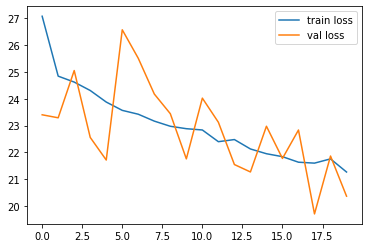

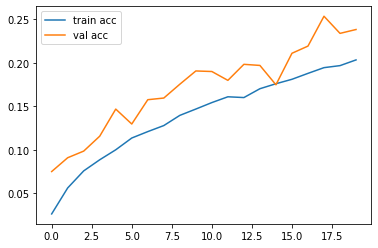

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Save the model**

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5') 
!cp /content/model_resnet50.h5 /content/drive/MyDrive/ #saving on drive

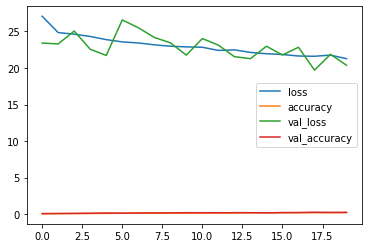

In [ ]:
import pandas as pd

pd.DataFrame(model.history.history).plot()

 **Making predictions**

In [ ]:

y_pred = model.predict(test_set, verbose=1)

99/99 [==============================] - 14s 127ms/step
